In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import numpy as np
import tensorflow as tf
import random
import os
import cv2
from imutils import paths
import matplotlib.pyplot as plt
import argparse
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import Dense, Conv2D, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow import keras
from PIL import Image
from keras.preprocessing import image
from sklearn.metrics import precision_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.applications.xception import preprocess_input

LOADING DATASET

In [2]:
oraldataset2 = "C:/Users/Md Amaan Mohiuddin/Desktop/Major Project/2000-dataset"
args={}
args["oraldataset2"]=oraldataset2
iPaths = list(paths.list_images(args["oraldataset2"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)
Data_Dir = "C:/Users/Md Amaan Mohiuddin/Desktop/Major Project/2000-dataset/"
Cimages = os.listdir(Data_Dir+"cancerous")
Nimages = os.listdir(Data_Dir+"non-cancerous")
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
(x_train, x_test, y_train, y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

trainAug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600, 2), (400, 2))

APPLYING SMOTE

PREDICTION ON DATASET

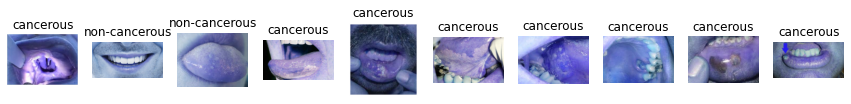

In [4]:

# randomly select 5 images
random_images = random.sample(iPaths, 10)

# display the images and their labels
fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for i, image_path in enumerate(random_images):
    # load the image and its label
    image = cv2.imread(image_path)
    label = os.path.basename(os.path.dirname(image_path))
    # display the image
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(label)
plt.show()

DEFINING CNN MODEL

In [5]:
# define the population of CNN models
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu',input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

Classification Report before applying the Genetic Algorithm

In [6]:
# make predictions on the test set using the model
y_predb = np.argmax(model.predict(x_test), axis=1)
# generate classification report before optimization
print("Classification Report before applying the Genetic Algorithm----")
precision = precision_score(y_test.argmax(axis=1), y_predb, zero_division=1, average='weighted')
f1 = f1_score(y_test.argmax(axis=1), y_predb, zero_division=1, average='weighted')
print(classification_report(y_test.argmax(axis=1), y_predb))

13/13 [==============================] - 4s 263ms/step
Classification Report before applying the Genetic Algorithm----
              precision    recall  f1-score   support

           0       0.72      0.37      0.48       257
           1       0.39      0.74      0.51       143

    accuracy                           0.50       400
   macro avg       0.56      0.55      0.50       400
weighted avg       0.60      0.50      0.50       400



FITNESS FUNCTION

In [7]:
population_size = 2
population = [model for _ in range(population_size)]

# define the fitness function
def fitness(model):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data = (x_test,y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    return score[1]

# evaluate the initial population
fitness_scores = [fitness(model) for model in population]

Epoch 1/5
50/50 [==============================] - 55s 1s/step - loss: 0.8342 - accuracy: 0.6206 - val_loss: 0.6560 - val_accuracy: 0.6425
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 0.6560 - accuracy: 0.6413 - val_loss: 0.6445 - val_accuracy: 0.6425
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.6311 - accuracy: 0.6594 - val_loss: 0.6187 - val_accuracy: 0.6600
Epoch 4/5
50/50 [==============================] - 51s 1s/step - loss: 0.5640 - accuracy: 0.7088 - val_loss: 0.6131 - val_accuracy: 0.6850
Epoch 5/5
50/50 [==============================] - 51s 1s/step - loss: 0.4818 - accuracy: 0.7719 - val_loss: 0.5211 - val_accuracy: 0.7625
Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.3905 - accuracy: 0.8163 - val_loss: 0.6029 - val_accuracy: 0.7675
Epoch 2/5
50/50 [==============================] - 51s 1s/step - loss: 0.3146 - accuracy: 0.8781 - val_loss: 0.4474 - val_accuracy: 0.8100
Epoch 3/5
50/50 [==========

CROSSOVER FUNCTION

In [8]:
#defining the crossover function
def crossover(model1, model2):
    # select random layers to swap
    n_layers = len(model1.layers)
    crossover_layer = np.random.randint(0, n_layers-1)
    
    # create a new model by swapping the layers
    new_model = Sequential()
    for i, layer in enumerate(model1.layers):
        if i < crossover_layer:
            new_model.add(layer)
        else:
            new_model.add(model2.layers[i])
    return new_model

MUTATION FUNCTION

In [9]:
#defining the mutation function

def mutate(model, mutation_rate = 0.2):
    mutated_model = keras.models.clone_model(model)
    for layer in mutated_model.layers:
        if np.random.uniform() < mutation_rate:
            if isinstance(layer, Conv2D):
                # mutate the filters of the convolutional layer
                filters_shape = layer.kernel.shape
                filters = np.random.normal(size=filters_shape)
                layer.kernel = keras.backend.variable(filters)
                new_population.append(mutated_model)
            elif isinstance(layer, Dense):
                # mutate the weights of the dense layer
                weights_shape = layer.kernel.shape
                weights = np.random.normal(size=weights_shape)
                layer.kernel = keras.backend.variable(weights)
                new_population.append(mutated_model)            
    return new_population

GENETIC ALGORITHM

In [10]:
# start the genetic algorithm loop
num_generations = 1
for i in range(num_generations):
    print("Generation:", i+1)
    # selection: choose the best models
    top_models_indices = np.argsort(fitness_scores)[::-1][:int(population_size*0.2)]
    top_models = [population[i] for i in top_models_indices]
    
    # crossover: create new models by combining the top models
    new_population = []
    for i in range(population_size - len(top_models)):
        # select two parent models
        parent1 = population[np.random.randint(0, len(population))]
        parent2 = population[np.random.randint(0, len(population))]
        
        # crossover the parent models to create a child model
        child_model = crossover(parent1, parent2)
        
        new_population.append(child_model)
        print("CrossOver Applied!")

        #Mutation
        new_population = mutate(model, mutation_rate = 0.2)
        print("Mutation Applied!")
    # evaluate the new population
    fitness_scores = [fitness(model) for model in new_population]
    # replace the old population with the new population
    population = new_population

Generation: 1
top models: 0
CrossOver Applied!
Mutation Applied!
CrossOver Applied!
Mutation Applied!
Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.1844 - accuracy: 0.9431 - val_loss: 0.4307 - val_accuracy: 0.8425
Epoch 2/5
50/50 [==============================] - 52s 1s/step - loss: 0.1723 - accuracy: 0.9556 - val_loss: 0.4104 - val_accuracy: 0.8675
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.1160 - accuracy: 0.9619 - val_loss: 0.3787 - val_accuracy: 0.8775
Epoch 4/5
50/50 [==============================] - 52s 1s/step - loss: 0.1259 - accuracy: 0.9606 - val_loss: 0.3961 - val_accuracy: 0.8875
Epoch 5/5
50/50 [==============================] - 52s 1s/step - loss: 0.0932 - accuracy: 0.9719 - val_loss: 0.4429 - val_accuracy: 0.8875
Epoch 1/5
50/50 [==============================] - 61s 1s/step - loss: 0.1248 - accuracy: 0.9606 - val_loss: 0.4426 - val_accuracy: 0.8825
Epoch 2/5
50/50 [==============================] - 52s 1s/step -

13/13 [==============================] - 3s 224ms/step


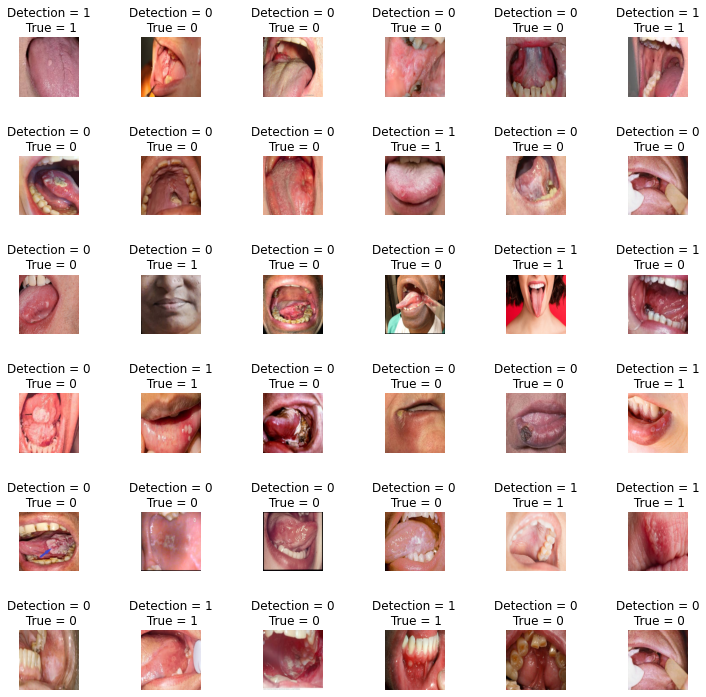

In [11]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_preda = model.predict(x_test, batch_size=32)
for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Detection = {}\n True = {}'.format(y_preda.argmax(axis=1)[i], y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

Classification Report after applying the Genetic Algorithm

In [12]:
# evaluate the best model on the test set
best_model = population[np.argmax(fitness_scores)]
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print("Best model test accuracy:", test_acc)
# make predictions on the test set using the best model
y_pred = np.argmax(best_model.predict(x_test), axis=1)
# generate classification report after optimization
print("Classification Report after applying the Genetic Algorithm----")
precision = precision_score(y_test.argmax(axis=1), y_pred, zero_division=1, average='weighted')
f1 = f1_score(y_test.argmax(axis=1), y_pred, zero_division=1, average='weighted')
print(classification_report(y_test.argmax(axis=1), y_pred))

Best model test accuracy: 0.8899999856948853
13/13 [==============================] - 3s 210ms/step
Classification Report after applying the Genetic Algorithm----
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       257
           1       0.87      0.82      0.84       143

    accuracy                           0.89       400
   macro avg       0.88      0.87      0.88       400
weighted avg       0.89      0.89      0.89       400



CONFUSION MATRIX

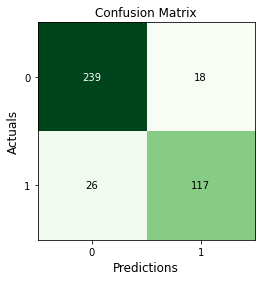

In [13]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

MODEL LOSS AND ACCURACY GRAPHS

Epoch 1/10
50/50 [==============================] - 72s 1s/step - loss: 0.0697 - accuracy: 0.9744 - val_loss: 0.0409 - val_accuracy: 0.9837
Epoch 2/10
50/50 [==============================] - 63s 1s/step - loss: 0.0581 - accuracy: 0.9762 - val_loss: 0.0530 - val_accuracy: 0.9812
Epoch 3/10
50/50 [==============================] - 60s 1s/step - loss: 0.0574 - accuracy: 0.9762 - val_loss: 0.0403 - val_accuracy: 0.9825
Epoch 4/10
50/50 [==============================] - 62s 1s/step - loss: 0.0500 - accuracy: 0.9825 - val_loss: 0.0371 - val_accuracy: 0.9825
Epoch 5/10
50/50 [==============================] - 61s 1s/step - loss: 0.0583 - accuracy: 0.9737 - val_loss: 0.0359 - val_accuracy: 0.9812
Epoch 6/10
50/50 [==============================] - 60s 1s/step - loss: 0.0485 - accuracy: 0.9775 - val_loss: 0.0347 - val_accuracy: 0.9812
Epoch 7/10
50/50 [==============================] - 60s 1s/step - loss: 0.0499 - accuracy: 0.9794 - val_loss: 0.0361 - val_accuracy: 0.9806
Epoch 8/10
50/50 [==

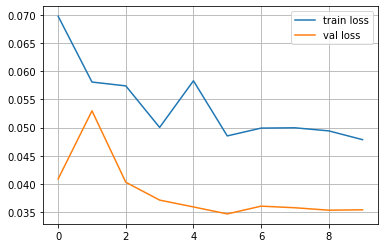

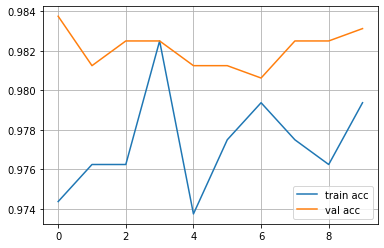

In [34]:
best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
R = best_model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data = (x_train,y_train))

# plot the loss
plt.grid(True)
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.grid(True)
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Example Predictions

1/1 [==============================] - 0s 63ms/step
Prediction: Non-Cancerous


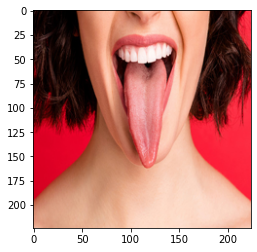

In [31]:
img_path = "C:/Users/Md Amaan Mohiuddin/Desktop/Major Project/2000-dataset/non-cancerous/37.jpg"  #Normal image
img_n = Image.open(img_path)
img_n = img_n.resize((224,224))
plt.imshow(img_n)
img_n = np.array(img_n)
img_n = cv2.GaussianBlur(img_n, (5, 5), 0)
img_n = np.array(img_n)
img_n = img_n.reshape(1, 224, 224, 3)
img_n = img_n / 255.0
prediction = best_model.predict(img_n)


if prediction[0][0] > 0.5:
    print("Prediction: Cancerous")
    
    
else:
    print("Prediction: Non-Cancerous")
    

1/1 [==============================] - 0s 50ms/step
Prediction: Cancerous


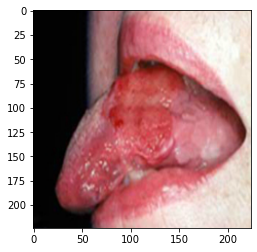

In [32]:
img_path = "C:/Users/Md Amaan Mohiuddin/Desktop/Major Project/2000-dataset/cancerous/slide10.jpg"  #Cancerous image
img_c = Image.open(img_path)
img_c = img_c.resize((224,224))
plt.imshow(img_c)
img_c = np.array(img_c)
img_c = cv2.GaussianBlur(img_c, (5, 5), 0)
img_c = np.array(img_c)
img_c = img_c.reshape(1, 224, 224, 3)
img_c = img_c / 255.0
prediction = best_model.predict(img_c)


if prediction[0][0] > 0.5:
    print("Prediction: Cancerous")
    
    
else:
    print("Prediction: Non-Cancerous")
    

LOADING INPUT IMAGE

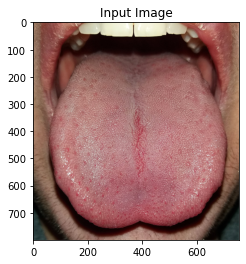

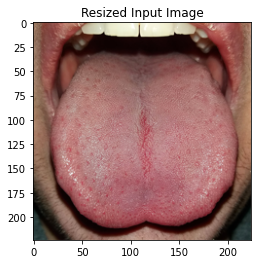

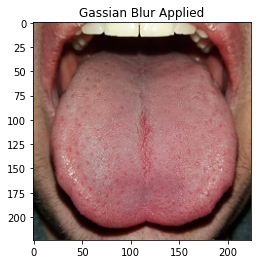

In [28]:
#Load the image
img_path = input("Enter the path of the image: ")
img1 = Image.open(img_path)
plt.imshow(img1)
plt.title('Input Image')
plt.show()


# Resize the image to (224, 224)
img = img1.resize((224, 224))
plt.imshow(img, cmap='gray')
plt.title('Resized Input Image')
plt.show()

# Apply Gaussian blur to the image
img = np.array(img)
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img)
plt.title('Gassian Blur Applied')
plt.show()

# Convert the image to a numpy array
img_array = np.array(img_blur)

# Reshape the array to a 4D tensor with shape (1, 224, 224, 1)
img_array = img_array.reshape(1, 224, 224, 3)

# Normalize the image data
img_array = img_array / 255.0

PREDICTION ON THE INPUT IMAGE USING BEST MODEL

1/1 [==============================] - 0s 66ms/step
Oral cancer not detected with probability: 0.999997541888888


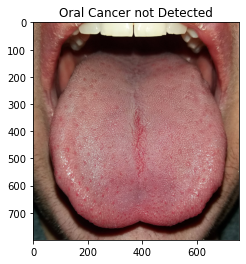

In [29]:
# make a prediction using the best model
prediction = best_model.predict(img_array)

# display the prediction result
if prediction[0][0] > 0.5:
    print("Oral cancer detected with probability:", prediction[0][0])
    plt.imshow(img1)
    plt.title('Oral Cancer Detected')
    plt.show()
else:
    print("Oral cancer not detected with probability:", 1 - prediction[0][0])
    plt.imshow(img1)
    plt.title('Oral Cancer not Detected')
    plt.show()